In [210]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.neural_network import MLPRegressor


In [211]:
# loads dataset
df = pd.read_csv("../data/challenge/train.csv")
df2 = pd.read_csv("../data/challenge/additive.csv")

#adds columns
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]
df.drop(["Fluxo"],inplace=True,axis=1)

df = df.drop(["DT_COMPTC"], axis=1)

In [212]:

# teste de colunas correlacionadas
# colunas = df.columns
# for coluna in df.columns:
#     colunas =colunas.drop(coluna)
#     for coluna2 in colunas:
#         df[f"{coluna}_{coluna2}"] = df[coluna]/df[coluna2]

# df.corr().to_csv("correlação.csv")

        

In [213]:
df["NDX_SPX"] = df["NDX"]/df['SPX']
df["Dol_NDX"] = df["Dol"]/df["NDX"]
df["IBOV_NDX"] = df["IBOV"]/df["NDX"]
df["Dol_SPX"] = df["Dol"]/df["SPX"]

In [214]:
df.corr()[["cap","resg"]]

,cap,resg
IBOV,0.649174,0.208245
Dol,0.513351,0.198365
NDX,0.597829,0.224206
SPX,0.568180,0.203005
cap,1.000000,0.256957
resg,0.256957,1.000000
NDX_SPX,0.538169,0.209422
Dol_NDX,-0.372469,-0.134013
IBOV_NDX,-0.257822,-0.110364
Dol_SPX,-0.169892,-0.042689


In [215]:

# def lock_lim(df):
#     cols = df.columns
#     for col in cols:
#         q1 = np.percentile(df[col], 25)
#         q3 = np.percentile(df[col], 75)
#         iqr = q3 - q1
#         ls = q3 + 1.5*iqr
#         li = q1 - 1.5*iqr
#         df[col][df[col] < li] = li
#         df[col][df[col] > ls] = ls
    
#     return df

# print(df.describe())
# df = lock_lim(df)
# print(df.describe())

In [216]:
#características
X_train = df.drop(["cap","resg"],axis=1)[:3000]
X_test = df.drop(["cap","resg"],axis=1)[3000:]


#resposta
y_train = df[["cap"]][:3000]
y_test = df[["cap"]][3000:]

y_train2 = df[["resg"]][:3000]
y_test2 = df[["resg"]][3000:]

In [217]:
#padroniza os dados
for column in X_train.columns:
    X_train[column] = np.log(X_train[column])
    X_test[column] = np.log(X_test[column])

scaler = MinMaxscaler()
train = scaler.fit_transform(X_train)

X_st = scaler.transform(X_test)

column in X_train.columns:
    X_train[column] = np.log(X_train[column])
    X_test[column] = np.log(X_test[column])


SyntaxError: invalid syntax (2121196848.py, line 11)

In [ ]:
X_train.head(10)

,IBOV,Dol,NDX,SPX,NDX_SPX,Dol_NDX,IBOV_NDX,Dol_SPX
0,10.155102,0.984286,7.379950,7.091809,0.288142,-6.395664,2.775152,-6.107523
1,10.120533,1.000264,7.359996,7.080069,0.279927,-6.359732,2.760537,-6.079804
2,10.114226,0.998424,7.354848,7.076434,0.278414,-6.356425,2.759378,-6.078011
3,10.100981,1.001293,7.350850,7.079934,0.270916,-6.349557,2.750131,-6.078640
4,10.116468,0.997686,7.355520,7.078502,0.277018,-6.357833,2.760948,-6.080815
5,10.097898,0.994547,7.355590,7.081910,0.273680,-6.361043,2.742308,-6.087363
6,10.101104,1.001110,7.348201,7.075800,0.272401,-6.347092,2.752903,-6.074691
7,10.106820,0.995656,7.356139,7.079774,0.276365,-6.360483,2.750681,-6.084118
8,10.118829,0.994732,7.342896,7.071106,0.271789,-6.348164,2.775933,-6.076374
9,10.123590,0.993807,7.353152,7.077093,0.276059,-6.359345,2.770438,-6.083286


In [ ]:
tscv = TimeSeriesSplit()
model = MLPRegressor(activation= "identity",
 alpha= 0.001,
 early_stopping= True,
 hidden_layer_sizes= (50, 20),
 shuffle= True,
 solver= "lbfgs")

model2 = MLPRegressor(activation= "identity",
 alpha= 0.001,
 early_stopping= True,
 hidden_layer_sizes= (50, 20),
 shuffle= True,
 solver= "lbfgs")

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ pegar aqui gridsearch
#feature tools: https://www.featuretools.com/



model.fit(X_train,y_train)
model2.fit(X_train,y_train2)


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='identity', alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(50, 20), solver='lbfgs')

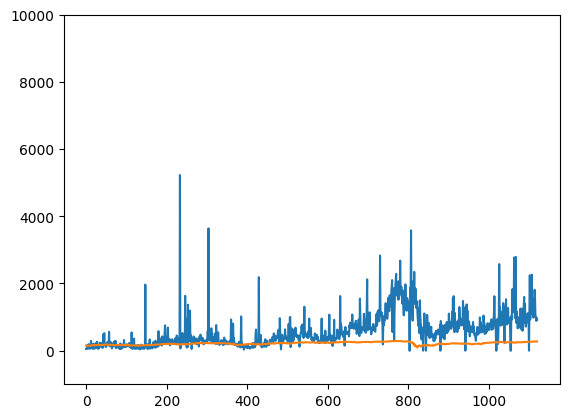

In [ ]:
pred = model.predict(X_test)
plt.plot(np.arange(len(pred)),y_test)
plt.plot(np.arange(len(pred)),pred)
plt.ylim([-1000,10000])
plt.show()

In [ ]:
# cv_results = cross_val_score(model,X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))
# cv_results2 = cross_val_score(model,X_train,y_train2,cv=5,scoring=make_scorer(mean_squared_error))

# print("resultado 1: "+str(cv_results))
# print("resultado 2: "+ str(cv_results2))

In [ ]:
#cross_val_score anteriores:
# resultado 1: [ 6591.29882165 45138.18346761 43770.83757897 72125.53988391
#   4343.04301193]
# resultado 2: [ 2581.08771242 14127.42286754 12749.45611702 73565.93156916
#  48381.5037505 ]

# resultado 1: [17256.37807653 39250.10928543 41945.27601829 73034.04017001
#   7938.25355035]
# resultado 2: [ 9033.99201005 14550.95505949 11714.98156943 72075.55120232
#  48011.13857335]

# resultado 1: [47956.52371029 39211.15036355 50611.35678332 70331.52042987
#  30563.27569949]
# resultado 2: [82117.76218635 29776.1417925  13406.30143254 71237.29570069
#  63537.73954729]

# resultado 1: [34493.15133236 39026.19262944 40438.42983293 72103.52944465
#   6457.89196041]
# resultado 2: [17717.42877256 15955.54871005 11202.64504217 70062.27743348
#  58757.5152198 ]

# tscv = TimeSeriesSplit()

# model = MLPRegressor(activation= 'relu',
#  early_stopping= True,
#  shuffle= True,
#  solver= "adam",
#  max_iter=400)

# model2 = MLPRegressor(activation= 'relu',
#  early_stopping= True,
#  shuffle= True,
#  solver= "adam",
#  max_iter=400)



# model.fit(X_train,y_train)
# model2.fit(X_train,y_train2)

resul1 =np.mean([ 6591.29882165, 45138.18346761, 43770.83757897, 72125.53988391,   4343.04301193])
resul2 = np.mean([47956.52371029, 39211.15036355, 50611.35678332, 70331.52042987, 30563.27569949])

In [ ]:
print("result1:"+str(resul1))

result1:34393.780552814


In [ ]:
print("result2:"+str(resul2))

result2:47734.765397304


In [ ]:
cv_results = cross_val_score(model,X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))
cv_results2 = cross_val_score(model2,X_train,y_train2,cv=5,scoring=make_scorer(mean_squared_error))

print("resultado 1: "+str(cv_results))
print("resultado 2: "+ str(cv_results2))

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Pyt

resultado 1: [34513.32341756 39117.90771673 40395.03674402 72105.93982444
  5000.49871052]
resultado 2: [17740.05329312 15962.15840306 11185.51566194 70064.34822008
 58798.50324423]


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
cv_results = cross_val_score(model2,X_train,y_train2,cv=5,scoring=make_scorer(mean_squared_error))


print(cv_results)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[17166.79125486 15998.07743534 11205.96844547 70062.36014373
 58767.25188379]


In [ ]:
df3 = pd.read_csv("../data/challenge/test.csv")
df3["NDX_SPX"] = df3["NDX"]/df3['SPX']
df3["Dol_NDX"] = df3["Dol"]/df3["NDX"]
df3["IBOV_NDX"] = df3["IBOV"]/df3["NDX"]
df3["Dol_SPX"] = df3["Dol"]/df3["SPX"]


In [ ]:
X_test = df3.drop(["DT_COMPTC"],axis=1)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
df3["cap"] = model.predict(X_test) 
df3["resg"] = model2.predict(X_test) 

In [ ]:
df3["Fluxo"] = df3["cap"] - df3["resg"]

In [ ]:
df4 = df3[["DT_COMPTC","Fluxo"]]

In [ ]:
df4.to_csv("../organização/submission.csv", index=False)